# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

SAT and ACT are both standardised national tests used for college admissions in the US. The College Board, which administers the SAT test, would like recommendations on specific states where it can dedicate its efforts to improve participation rates.  

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:

sat2017 = pd.read_csv('../data/sat_2017.csv')
act2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: ACT 2017 dataset contains one additional row for national average that the SAT 2017 does not have. 

#### 4a. Does the data look complete? 

Answer: There are no null values but there are missing columns which are present in the source data. 
#SAT 2017 
missing participation column
#ACT 2017
missing % of graduates tested & average composite scores columns

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
sat2017.describe()
#for the SAT test, the lowest value possible for Reading & Writing is 200, Math is also 200. 

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
act2017.describe()
#the min value of 2.3 for Science is way too low for the state average score

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Answer: SAT 2017 min value for Maths is too low and ACT 2017 min value for Science is too low

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
act2017.head(55)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [10]:
sat2017.head(55)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [11]:
#looking at which rows may contain the wrong value by fitering for values lower than the lowest possible score
sat2017.loc[sat2017['Math']<200,:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [12]:
#found the culprit in the State of Maryland for the odd min value for the column after diving further into the data 
sat2017.at[20, "Math"] = 524
sat2017.at[20, "Math"]

524

In [13]:
#found an odd 20.2x value under Wyoming 
act2017.at[51, 'Composite'] = 20.2
act2017.at[51, 'Composite']

20.2

In [14]:
##looking at which rows may contain the wrong value by 
#fitering for values that are lower than what would be expected of a state-wide average score
act2017.loc[act2017['Science']<10,:]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [15]:
act2017.at[21, "Science"] = 23.2
act2017.at[21, "Science"]

23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
#code
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [17]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:Participation is a percentage and should be reflected as float64 in both data sets, composite should be reflected as float64 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
#looking for odd values that might be present in the data
act2017['Participation'].unique

<bound method Series.unique of 0      60%
1     100%
2      65%
3      62%
4     100%
5      31%
6     100%
7      31%
8      18%
9      32%
10     73%
11     55%
12     90%
13     38%
14     93%
15     35%
16     67%
17     73%
18    100%
19    100%
20      8%
21     28%
22     29%
23     29%
24    100%
25    100%
26    100%
27    100%
28     84%
29    100%
30     18%
31     34%
32     66%
33     31%
34    100%
35     98%
36     75%
37    100%
38     40%
39     23%
40     21%
41    100%
42     80%
43    100%
44     45%
45    100%
46     29%
47     29%
48     29%
49     69%
50    100%
51    100%
Name: Participation, dtype: object>

In [19]:
#code
def data_cleanup(data_frame, column):
    data_frame[column] = list(map(lambda x : x[:-1], data_frame[column].values))
    data_frame[column] = data_frame[column].astype(float)
    return data_frame

In [20]:
data_cleanup(act2017, 'Participation')
act2017.head(55)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2


In [21]:
data_cleanup(sat2017, 'Participation')
sat2017.head(55)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055
5,Colorado,11.0,606,595,1201
6,Connecticut,100.0,530,512,1041
7,Delaware,100.0,503,492,996
8,District of Columbia,100.0,482,468,950
9,Florida,83.0,520,497,1017


- Fix any individual values preventing other columns from being the appropriate type.

In [22]:
#composite should be a float dtype as well
act2017['Composite'] = act2017['Composite'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [23]:
#code
sat2017.columns = sat2017.columns.str.lower()
act2017.columns = act2017.columns.str.lower()

- Display the data types again to confirm they are correct.

In [24]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     float64
 2   english        52 non-null     float64
 3   math           52 non-null     float64
 4   reading        52 non-null     float64
 5   science        52 non-null     float64
 6   composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [25]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   state                               51 non-null     object 
 1   participation                       51 non-null     float64
 2   evidence-based reading and writing  51 non-null     int64  
 3   math                                51 non-null     int64  
 4   total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [26]:
#code
sat2017.rename(columns={
    "participation" : "sat_2017_participation",
    "evidence-based reading and writing" : "sat_2017_reading_writing",
    "math" : "sat_2017_math",
    "total" : "sat_2017_total"
}, inplace=True)
sat2017.head()

,state,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [27]:
act2017.rename(columns={
    "participation" : "act_2017_participation",
    "english" : "act_2017_english",
    "math" : "act_2017_math",
    "reading" : "act_2017_reading",
    "science" : "act_2017_science",
    "composite" : "act_2017_composite"
}, inplace=True)
act2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state_index|*object*|ACT SAT|The 51 States of America
|act_2017_participation|*float*|ACT|ACT 2017 Participation rate for each State (given as a % of graduates from that state in that year)
|act_2017_english|*float*|ACT|ACT 2017 Average English scores per State
|act_2017_math|*float*|ACT|ACT 2017 Average Math scores per State
|act_2017_reading|*float*|ACT|ACT 2017 Average Reading scores per State
|act_2017_science|*float*|ACT|ACT 2017 Average Science scores per State
|act_2017_composite|*float*|ACT|ACT 2017 Average Composite scores per State (scale score taken from the raw scores of  ACT English, Math, Reading and Science tests)
|act_2018_participation|*float*|ACT|ACT 2018 Participation rate for each State (given as a % of graduates from that state in that year)
|act_2018_english|*float*|ACT|ACT 2018 Average English scores per State
|act_2018_math|*float*|ACT|ACT 2018 Average Math scores per State
|act_2018_reading|*float*|ACT|ACT 2018 Average Reading scores per State
|act_2018_science|*float*|ACT|ACT 2018 Average Science scores per State
|act_2018_composite|*float*|ACT|ACT 2018 Average Composite scores per State (scale score taken from the raw scores of  ACT English, Math, Reading and Science tests)
|sat_2017_participation|*float*|SAT|SAT 2017 Participation rate for each State
|sat_2017_reading_writing|*integer*|SAT|SAT 2017 Average Evidence-Based Reading and Writing scores per State 
|sat_2017_math|*Integer*|SAT|SAT 2017 Average Math scores per State 
|sat_2017_total|*Integer*|SAT|SAT 2017 Average Total scores per State
|sat_2018_participation|*float*|SAT|SAT 2018 Participation rate for each State
|sat_2018_reading_writing|*integer*|SAT|SAT 2018 Average Evidence-Based Reading and Writing scores per State 
|sat_2018_math|*Integer*|SAT|SAT 2018 Average Math scores per State 
|sat_2018_total|*Integer*|SAT|SAT 2018 Average Total scores per State

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [28]:
#code
act2017.drop([0], axis = 0, inplace=True)

In [29]:
act2017.head(55)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
10,Florida,73.0,19.0,19.4,21.0,19.4,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
act2017['state_index'] = act2017['state']
act2017['state_index']

1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5               California
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
37                Oklahoma
3

In [31]:
sat2017['state_index'] = sat2017['state']
sat2017['state_index']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

In [32]:
#Code:
combined_2017 = pd.merge(act2017, sat2017, on=["state_index"], how='left')
combined_2017.head(55)

,state_x,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,state_index,state_y,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,Alabama,Alabama,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,Alaska,Alaska,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,Arizona,Arizona,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,Arkansas,Arkansas,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,California,California,53.0,531,524,1055
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,Colorado,Colorado,11.0,606,595,1201
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,Connecticut,Connecticut,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,Delaware,Delaware,100.0,503,492,996
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,District of Columbia,District of Columbia,100.0,482,468,950
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,Florida,Florida,83.0,520,497,1017


In [33]:
combined_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_x                   51 non-null     object 
 1   act_2017_participation    51 non-null     float64
 2   act_2017_english          51 non-null     float64
 3   act_2017_math             51 non-null     float64
 4   act_2017_reading          51 non-null     float64
 5   act_2017_science          51 non-null     float64
 6   act_2017_composite        51 non-null     float64
 7   state_index               51 non-null     object 
 8   state_y                   51 non-null     object 
 9   sat_2017_participation    51 non-null     float64
 10  sat_2017_reading_writing  51 non-null     int64  
 11  sat_2017_math             51 non-null     int64  
 12  sat_2017_total            51 non-null     int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 5.6+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [34]:
#code
combined_2017.to_csv("../data/combined_2017.csv", index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [35]:
#import and read both CSV files
act2018 = pd.read_csv('../data/act_2018_updated.csv')
sat2018 = pd.read_csv('../data/sat_2018.csv')

In [36]:
act2018.head(55)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [37]:
act2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [38]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [39]:
sat2018.head(55)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [40]:
sat2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [41]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [42]:
#changing participation in sat2018 dataframe to float
data_cleanup(sat2018, "Participation")

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076
5,Colorado,100.0,519,506,1025
6,Connecticut,100.0,535,519,1053
7,Delaware,100.0,505,492,998
8,District of Columbia,92.0,497,480,977
9,Florida,56.0,550,549,1099


In [43]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [44]:
#changing ACT 2018 percentage of students tested to float to allow it to be compared to participation in SAT
act2018['Percentage of Students Tested'] = act2018['Percentage of Students Tested'].astype(float)

In [45]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [46]:
#renaming of columns to ensure that data can be compared easily
sat2018.rename(columns={
    "State" : "state",
    "Participation" : "sat_2018_participation",
    "Evidence-Based Reading and Writing" : "sat_2018_reading_writing",
    "Math" : "sat_2018_math",
    "Total" : "sat_2018_total"
}, inplace=True)
sat2018.head()

,state,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [47]:
#renaming of columns to ensure that data can be compared easily
act2018.rename(columns={
    "State" : "state",
    "Percentage of Students Tested" : "act_2018_participation",
    "Average English Score" : "act_2018_english",
    "Average Math Score" : "act_2018_math",
    "Average Reading Score" : "act_2018_reading",
    "Average Science Score" : "act_2018_science",
    "Average Composite Score" : "act_2018_composite"
}, inplace=True)
act2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,state_index
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,Alabama
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,Alaska
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,Arizona
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,Arkansas
5,California,31.0,22.5,22.7,23.1,22.2,22.8,California


In [48]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   act_2018_participation  51 non-null     float64
 2   act_2018_composite      51 non-null     float64
 3   act_2018_english        51 non-null     float64
 4   act_2018_math           51 non-null     float64
 5   act_2018_reading        51 non-null     float64
 6   act_2018_science        51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [49]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     51 non-null     object 
 1   sat_2018_participation    51 non-null     float64
 2   sat_2018_reading_writing  51 non-null     int64  
 3   sat_2018_math             51 non-null     int64  
 4   sat_2018_total            51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [50]:
#assigning a new index to join the two dataframes to allow the states that come with the CSVs to be consulted on
#in case of errors, spot data integrity issues, etc
act2018['state_index'] = act2018['state']
act2018['state_index']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

In [51]:
sat2018['state_index'] = sat2018['state']
sat2018['state_index']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                Oklahoma
36                    Ohio
3

In [52]:
#combining the dataframes for 2018
combined_2018 = pd.merge(act2018, sat2018, on=["state_index"], how='left')
combined_2018.head(55)

,state_x,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,state_index,state_y,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0,Alabama,Alabama,6.0,595,571,1166
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,Alaska,Alaska,43.0,562,544,1106
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,Arizona,Arizona,29.0,577,572,1149
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,Arkansas,Arkansas,5.0,592,576,1169
4,California,27.0,22.7,22.5,22.5,23.0,22.1,California,California,60.0,540,536,1076
5,Colorado,30.0,23.9,23.9,23.2,24.4,23.5,Colorado,Colorado,100.0,519,506,1025
6,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9,Connecticut,Connecticut,100.0,535,519,1053
7,Delaware,17.0,23.2,23.7,23.1,24.5,23.4,Delaware,Delaware,100.0,505,492,998
8,District of Columbia,32.0,23.6,23.7,22.7,24.4,23.0,District of Columbia,District of Columbia,92.0,497,480,977
9,Florida,66.0,19.9,19.2,19.3,21.1,19.5,Florida,Florida,56.0,550,549,1099


In [53]:
#saving the combined 2018 dataframe to CSV for reference
combined_2018.to_csv("../data/combined_2018.csv", index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [54]:
final = pd.merge(combined_2017, combined_2018, on=["state_index"], how='left')
final.shape

(51, 25)

In [55]:
#saving the combined dataframe to CSV for reference
final.to_csv("../data/final.csv", index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [56]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [57]:
#code
import math
import sys

def std_dev(data):
    n = len(data)

    if n <= 1:
        return 0.0

    mean, sd = mean_calc(data), 0.0

    # calculate stan. dev.
    for el in data:
        sd += (float(el) - mean)**2
    sd = math.sqrt(sd / float(n-1))

    return sd

def mean_calc(ls):
    n, mean = len(ls), 0.0

    if n <= 1:
        return ls[0]

    # calculate average
    for el in ls:
        mean = mean + float(el)
    mean = mean / float(n)

    return mean

In [58]:
std_dev(final['act_2018_english'])

2.4463562339793055

In [59]:
final['state_x_x'].dtype

dtype('O')

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [60]:
sd = {col.name:std_dev(col) for col in [final[i] for i in final.columns 
                                   if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}

In [61]:
sd

{'act_2017_participation': 32.14084201588683,
 'act_2017_english': 2.35367713980303,
 'act_2017_math': 1.9819894936505533,
 'act_2017_reading': 2.0672706264873146,
 'act_2017_science': 1.7393530462812443,
 'act_2017_composite': 2.020694891154341,
 'sat_2017_participation': 35.276632270013046,
 'sat_2017_reading_writing': 45.66690138768932,
 'sat_2017_math': 47.12139516560329,
 'sat_2017_total': 92.49481172519046,
 'act_2018_participation': 34.08097623567245,
 'act_2018_composite': 2.1062781969951776,
 'act_2018_english': 2.4463562339793055,
 'act_2018_math': 2.035764538177723,
 'act_2018_reading': 2.1672445684804105,
 'act_2018_science': 1.8701137639716146,
 'sat_2018_participation': 37.31425633039196,
 'sat_2018_reading_writing': 47.50262737831599,
 'sat_2018_math': 47.77262322095955,
 'sat_2018_total': 94.15508275097599}

In [62]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


In [63]:
np.std(final, ddof=1)

act_2017_participation      32.140842
act_2017_english             2.353677
act_2017_math                1.981989
act_2017_reading             2.067271
act_2017_science             1.739353
act_2017_composite           2.020695
sat_2017_participation      35.276632
sat_2017_reading_writing    45.666901
sat_2017_math               47.121395
sat_2017_total              92.494812
act_2018_participation      34.080976
act_2018_composite           2.106278
act_2018_english             2.446356
act_2018_math                2.035765
act_2018_reading             2.167245
act_2018_science             1.870114
sat_2018_participation      37.314256
sat_2018_reading_writing    47.502627
sat_2018_math               47.772623
sat_2018_total              94.155083
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Pandas describe output shows up to six decimal places while the manual calculations comes up to fourteen decimal places. Numpy's std method has a 'Delta Degrees of Freedom' ddof parameter within the function which is set to zero by default, pandas assumes that the datasets that we use in pandas are samples and adds a degree of freedom by default in its calculations. Applying 1 to the operator ddof in np.std will yield us the same result as pandas.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [64]:
#SAT 2017 highest participation by State, in descending order of participation
final[['state_index', 'sat_2017_participation', 'sat_2017_total', 
       'sat_2018_participation', 'sat_2018_total', 'act_2017_participation', 
       'act_2018_participation']].sort_values(by='sat_2017_participation', ascending=False).head(20)

,state_index,sat_2017_participation,sat_2017_total,sat_2018_participation,sat_2018_total,act_2017_participation,act_2018_participation
8,District of Columbia,100.0,950,92.0,977,32.0,32.0
22,Michigan,100.0,1005,100.0,1011,29.0,22.0
6,Connecticut,100.0,1041,100.0,1053,31.0,26.0
7,Delaware,100.0,996,100.0,998,18.0,17.0
29,New Hampshire,96.0,1052,96.0,1063,18.0,16.0
19,Maine,95.0,1012,99.0,1013,8.0,7.0
12,Idaho,93.0,1005,100.0,1001,38.0,36.0
9,Florida,83.0,1017,56.0,1099,73.0,66.0
21,Massachusetts,76.0,1107,80.0,1125,29.0,25.0
39,Rhode Island,71.0,1062,97.0,1018,21.0,15.0


In [65]:
#SAT 2018 highest participation by State, in descending order of participation
final[['state_index', 'sat_2017_participation', 'sat_2017_total', 
       'sat_2018_participation', 'sat_2018_total', 'act_2017_participation',
       'act_2018_participation']].sort_values(by='sat_2018_participation', ascending=False).head(10)

,state_index,sat_2017_participation,sat_2017_total,sat_2018_participation,sat_2018_total,act_2017_participation,act_2018_participation
5,Colorado,11.0,1201,100.0,1025,100.0,30.0
6,Connecticut,100.0,1041,100.0,1053,31.0,26.0
7,Delaware,100.0,996,100.0,998,18.0,17.0
22,Michigan,100.0,1005,100.0,1011,29.0,22.0
12,Idaho,93.0,1005,100.0,1001,38.0,36.0
19,Maine,95.0,1012,99.0,1013,8.0,7.0
13,Illinois,9.0,1115,99.0,1019,93.0,43.0
39,Rhode Island,71.0,1062,97.0,1018,21.0,15.0
29,New Hampshire,96.0,1052,96.0,1063,18.0,16.0
8,District of Columbia,100.0,950,92.0,977,32.0,32.0


In [66]:
final[(final['sat_2017_participation']==100) & (final['sat_2018_participation']==100)]

,state_x_x,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,state_index,state_y_x,sat_2017_participation,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,state_y_y,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,Connecticut,Connecticut,100.0,...,25.6,26.0,24.8,26.1,24.9,Connecticut,100.0,535,519,1053
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,Delaware,Delaware,100.0,...,23.2,23.7,23.1,24.5,23.4,Delaware,100.0,505,492,998
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,Michigan,Michigan,100.0,...,24.4,24.5,23.9,24.7,23.9,Michigan,100.0,511,499,1011


Connecticut, Delaware and Michigan have retained their 100% participation in SAT for consecutive years 2017 to 2018

In [67]:
##ACT 2017 highest participation by State, in descending order of participation
final[['state_index', 'sat_2017_participation', 'sat_2017_total',
       'sat_2018_participation', 'sat_2018_total', 'act_2017_participation',
       'act_2018_participation']].sort_values(by='act_2017_participation', ascending=False).head(10)

,state_index,sat_2017_participation,sat_2017_total,sat_2018_participation,sat_2018_total,act_2017_participation,act_2018_participation
0,Alabama,5.0,1165,6.0,1166,100.0,100.0
17,Kentucky,4.0,1247,4.0,1248,100.0,100.0
49,Wisconsin,3.0,1291,3.0,1294,100.0,100.0
44,Utah,3.0,1238,4.0,1010,100.0,100.0
42,Tennessee,5.0,1228,6.0,1231,100.0,100.0
40,South Carolina,50.0,1064,55.0,1070,100.0,100.0
36,Oklahoma,7.0,1047,8.0,1062,100.0,100.0
33,North Carolina,49.0,1081,52.0,1098,100.0,100.0
28,Nevada,26.0,1116,23.0,1140,100.0,100.0
26,Montana,10.0,1196,10.0,1198,100.0,100.0


In [68]:
##ACT 2018 highest participation by State, in descending order of participation
final[['state_index', 'sat_2017_participation', 'sat_2017_total',
       'sat_2018_participation', 'sat_2018_total', 'act_2017_participation',
       'act_2018_participation']].sort_values(by='act_2018_participation', ascending=False).head(10)

,state_index,sat_2017_participation,sat_2017_total,sat_2018_participation,sat_2018_total,act_2017_participation,act_2018_participation
0,Alabama,5.0,1165,6.0,1166,100.0,100.0
17,Kentucky,4.0,1247,4.0,1248,100.0,100.0
49,Wisconsin,3.0,1291,3.0,1294,100.0,100.0
44,Utah,3.0,1238,4.0,1010,100.0,100.0
42,Tennessee,5.0,1228,6.0,1231,100.0,100.0
40,South Carolina,50.0,1064,55.0,1070,100.0,100.0
36,Oklahoma,7.0,1047,8.0,1062,100.0,100.0
35,Ohio,12.0,1149,18.0,1099,75.0,100.0
33,North Carolina,49.0,1081,52.0,1098,100.0,100.0
28,Nevada,26.0,1116,23.0,1140,100.0,100.0


In [69]:
final[(final['act_2017_participation']==100) & (final['act_2018_participation']==100)]

,state_x_x,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,state_index,state_y_x,sat_2017_participation,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,state_y_y,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,Alabama,Alabama,5.0,...,19.1,18.9,18.3,19.6,19.0,Alabama,6.0,595,571,1166
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,Arkansas,Arkansas,3.0,...,19.4,19.1,18.9,19.7,19.4,Arkansas,5.0,592,576,1169
17,Kentucky,100.0,19.6,19.4,20.5,20.1,20.0,Kentucky,Kentucky,4.0,...,20.2,19.9,19.7,20.8,20.1,Kentucky,4.0,630,618,1248
18,Louisiana,100.0,19.4,18.8,19.8,19.6,19.5,Louisiana,Louisiana,4.0,...,19.2,19.0,18.5,19.6,19.1,Louisiana,4.0,615,595,1210
24,Mississippi,100.0,18.2,18.1,18.8,18.8,18.6,Mississippi,Mississippi,2.0,...,18.6,18.2,18.1,18.9,18.6,Mississippi,3.0,630,606,1236
25,Missouri,100.0,19.8,19.9,20.8,20.5,20.4,Missouri,Missouri,3.0,...,20.0,19.5,19.7,20.5,20.0,Missouri,4.0,633,629,1262
26,Montana,100.0,19.0,20.2,21.0,20.5,20.3,Montana,Montana,10.0,...,20.0,18.7,19.9,20.7,20.0,Montana,10.0,606,592,1198
28,Nevada,100.0,16.3,18.0,18.1,18.2,17.8,Nevada,Nevada,26.0,...,17.7,16.6,17.8,18.0,17.9,Nevada,23.0,574,566,1140
33,North Carolina,100.0,17.8,19.3,19.6,19.3,19.1,North Carolina,North Carolina,49.0,...,19.1,18.0,19.3,19.5,19.2,North Carolina,52.0,554,543,1098
36,Oklahoma,100.0,18.5,18.8,20.1,19.6,19.4,Oklahoma,Oklahoma,7.0,...,19.3,18.4,18.8,20.1,19.4,Oklahoma,8.0,541,521,1062


15 State had 100% participation rates for ACT for 2017 and 2018, Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming

In [70]:
#Do any states show have >50% participation on both tests either year?
final[(final['act_2017_participation']>50) & (final['act_2018_participation']>50) 
     & (final['sat_2017_participation']>50) & (final['sat_2018_participation']>50)]

,state_x_x,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,state_index,state_y_x,sat_2017_participation,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,state_y_y,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,Florida,Florida,83.0,...,19.9,19.2,19.3,21.1,19.5,Florida,56.0,550,549,1099
10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,Georgia,Georgia,61.0,...,21.4,20.9,20.7,21.2,21.4,Georgia,70.0,542,522,1064
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,Hawaii,Hawaii,55.0,...,18.9,18.2,19.0,19.1,19.0,Hawaii,56.0,480,530,1010


The states of Florida, Georgia and Hawaii have more than 50% participation in both SAT and ACT for 2017 and 2018


In [71]:
final[(final['act_2017_participation']>50) & (final['sat_2017_participation']>50)
      | (final['act_2018_participation']>50)  & (final['sat_2018_participation']>50)]

,state_x_x,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,state_index,state_y_x,sat_2017_participation,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,state_y_y,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,Florida,Florida,83.0,...,19.9,19.2,19.3,21.1,19.5,Florida,56.0,550,549,1099
10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,Georgia,Georgia,61.0,...,21.4,20.9,20.7,21.2,21.4,Georgia,70.0,542,522,1064
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,Hawaii,Hawaii,55.0,...,18.9,18.2,19.0,19.1,19.0,Hawaii,56.0,480,530,1010
33,North Carolina,100.0,17.8,19.3,19.6,19.3,19.1,North Carolina,North Carolina,49.0,...,19.1,18.0,19.3,19.5,19.2,North Carolina,52.0,554,543,1098
40,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,South Carolina,South Carolina,50.0,...,18.3,17.3,18.2,18.6,18.5,South Carolina,55.0,547,523,1070


In [72]:

final[['state_index', 'sat_2017_participation', 'sat_2017_total', 'sat_2018_participation', 'sat_2018_total', 'act_2017_participation']].sort_values(by='sat_2017_total', ascending=False).head(10)

,state_index,sat_2017_participation,sat_2017_total,sat_2018_participation,sat_2018_total,act_2017_participation
23,Minnesota,3.0,1295,4.0,1298,100.0
49,Wisconsin,3.0,1291,3.0,1294,100.0
15,Iowa,2.0,1275,3.0,1265,67.0
25,Missouri,3.0,1271,4.0,1262,100.0
16,Kansas,4.0,1260,4.0,1265,73.0
34,North Dakota,2.0,1256,2.0,1283,98.0
27,Nebraska,3.0,1253,3.0,1252,84.0
17,Kentucky,4.0,1247,4.0,1248,100.0
24,Mississippi,2.0,1242,3.0,1236,100.0
44,Utah,3.0,1238,4.0,1010,100.0


In [73]:
final[['state_index', 'sat_2017_participation', 'sat_2017_total', 'sat_2018_participation', 'sat_2018_total', 'act_2017_participation']].sort_values(by='sat_2018_participation', ascending=False).head(10)

,state_index,sat_2017_participation,sat_2017_total,sat_2018_participation,sat_2018_total,act_2017_participation
5,Colorado,11.0,1201,100.0,1025,100.0
6,Connecticut,100.0,1041,100.0,1053,31.0
7,Delaware,100.0,996,100.0,998,18.0
22,Michigan,100.0,1005,100.0,1011,29.0
12,Idaho,93.0,1005,100.0,1001,38.0
19,Maine,95.0,1012,99.0,1013,8.0
13,Illinois,9.0,1115,99.0,1019,93.0
39,Rhode Island,71.0,1062,97.0,1018,21.0
29,New Hampshire,96.0,1052,96.0,1063,18.0
8,District of Columbia,100.0,950,92.0,977,32.0


In [74]:
final[['state_index', 'act_2017_participation', 'act_2017_composite']].sort_values(by='act_2017_composite', ascending=False).head(10)

,state_index,act_2017_participation,act_2017_composite
29,New Hampshire,18.0,25.5
21,Massachusetts,29.0,25.4
6,Connecticut,31.0,25.2
19,Maine,8.0,24.3
8,District of Columbia,32.0,24.2
32,New York,31.0,24.2
22,Michigan,29.0,24.1
7,Delaware,18.0,24.1
39,Rhode Island,21.0,24.0
30,New Jersey,34.0,23.9


In [75]:
final[['state_index', 'act_2018_participation', 'act_2018_composite']].sort_values(by='act_2018_participation', ascending=False).head(10)

,state_index,act_2018_participation,act_2018_composite
0,Alabama,100.0,19.1
17,Kentucky,100.0,20.2
49,Wisconsin,100.0,20.5
44,Utah,100.0,20.4
42,Tennessee,100.0,19.6
40,South Carolina,100.0,18.3
36,Oklahoma,100.0,19.3
35,Ohio,100.0,20.3
33,North Carolina,100.0,19.1
28,Nevada,100.0,17.7


In [76]:
final[['state_index', 'act_2018_participation', 'act_2018_composite']].sort_values(by='act_2018_composite', ascending=False).head(10)

,state_index,act_2018_participation,act_2018_composite
6,Connecticut,26.0,25.6
21,Massachusetts,25.0,25.5
29,New Hampshire,16.0,25.1
32,New York,27.0,24.5
22,Michigan,22.0,24.4
39,Rhode Island,15.0,24.2
45,Vermont,24.0,24.1
19,Maine,7.0,24.0
46,Virginia,24.0,23.9
5,Colorado,30.0,23.9


In [77]:
final.loc[(final["sat_2018_participation"] - final["sat_2017_participation"]).idxmax()]["state_index"]

'Illinois'

In [78]:
final.loc[[13]][['state_index', 'sat_2017_participation',
       'sat_2018_participation', 'act_2017_participation',
       'act_2018_participation']]

,state_index,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
13,Illinois,9.0,99.0,93.0,43.0


The state with the biggest increase in SAT participation from 2017 to 2018  is Illinois, which rose from 9% to 99%.

In [79]:
final.loc[(final["sat_2017_participation"] - final["sat_2018_participation"]).idxmax()]["state_index"]

'Florida'

In [80]:
final.loc[[9]][['state_index', 'sat_2017_participation',
       'sat_2018_participation', 'act_2017_participation',
       'act_2018_participation']]

,state_index,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
9,Florida,83.0,56.0,73.0,66.0


The state with the biggest decrease in SAT participation from 2017 to 2018 is Florida, which dropped from 83% to 56%.

In [81]:
final.loc[(final["act_2018_participation"] - final["act_2017_participation"]).idxmax()]["state_index"]

'Ohio'

In [82]:
final.loc[[35]][['state_index', 'sat_2017_participation',
       'sat_2018_participation', 'act_2017_participation',
       'act_2018_participation']]

,state_index,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
35,Ohio,12.0,18.0,75.0,100.0


The state with the biggest increase in ACT participation from 2017 to 2018 is Ohio, which rose from 75% to 100%.

In [83]:
final.loc[(final["act_2017_participation"] - final["act_2018_participation"]).idxmax()]["state_index"]

'Colorado'

In [84]:
final.loc[[5]][['state_index', 'sat_2017_participation',
       'sat_2018_participation', 'act_2017_participation',
       'act_2018_participation']]

,state_index,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
5,Colorado,11.0,100.0,100.0,30.0


The state with the biggest decrease in ACT participation from 2017 to 2018 is Colorado, which dropped from 100% to 30%, which was found to have made the switch from ACT to SAT in 2018.

https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

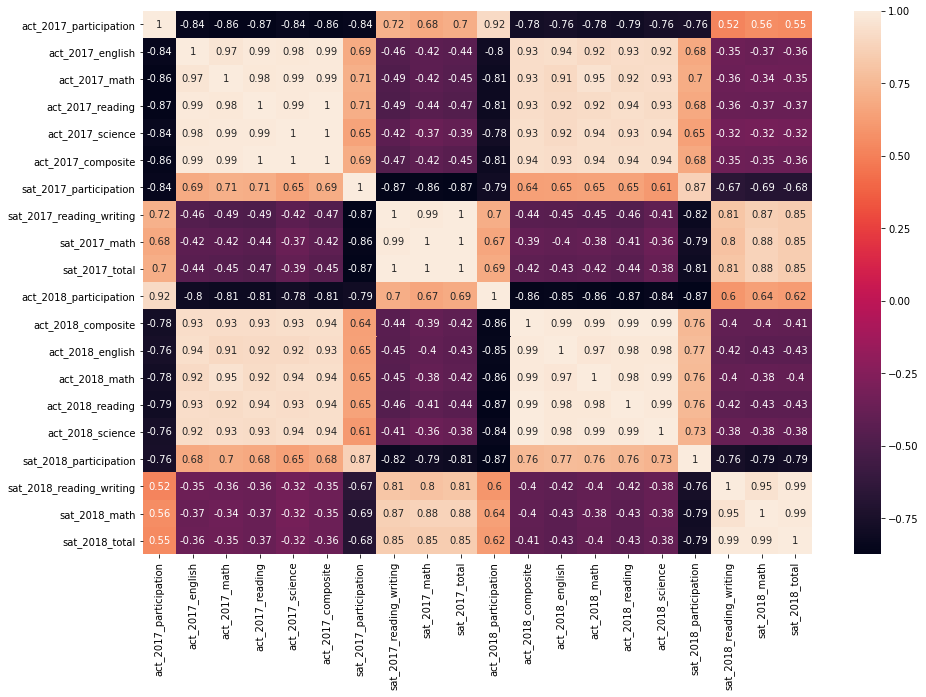

In [85]:
fig, ax = plt.subplots(figsize=(15,10))
final_correlations = final.corr();
sns.heatmap(final_correlations, annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [86]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=12)# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels, fontsize=12)
        ax[i].set_ylabel("Number of States", fontsize= 12)
        ax[i].axvline(np.mean(dataframe[column]), color='maroon', linestyle='--');
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

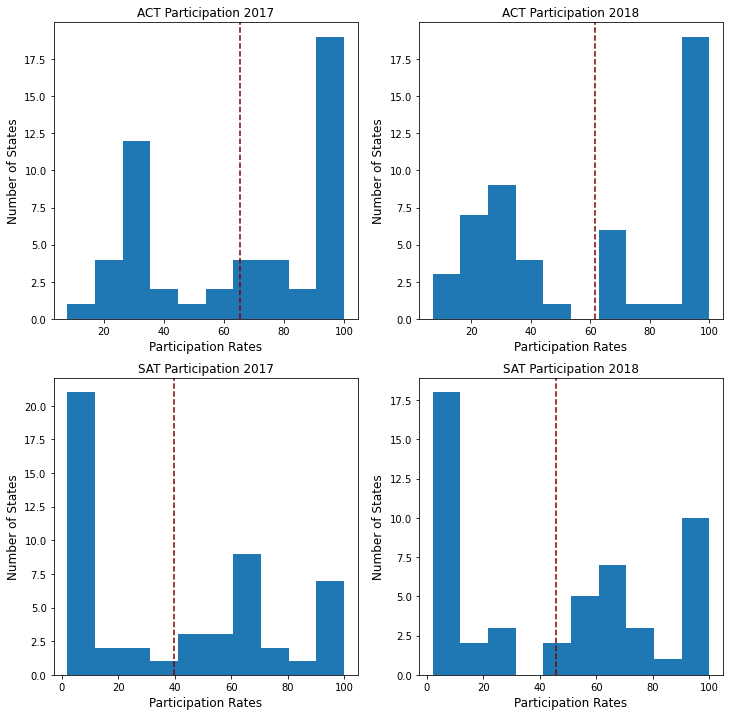

In [87]:
subplot_histograms(
                    final, 
                    ['act_2017_participation', 
                     'act_2018_participation',
                     'sat_2017_participation', 
                     'sat_2018_participation'],
                    ['ACT Participation 2017',
                     'ACT Participation 2018',
                     'SAT Participation 2017',
                     'SAT Participation 2018'], 
                     'Participation Rates'
)


The mean for ACT participation nationally looks to have decreased from 2017 to 2018 while the mean for SAT national participation looks to have increased from 2017 to 2018 and more states registering 100% participation for SAT in 2018.

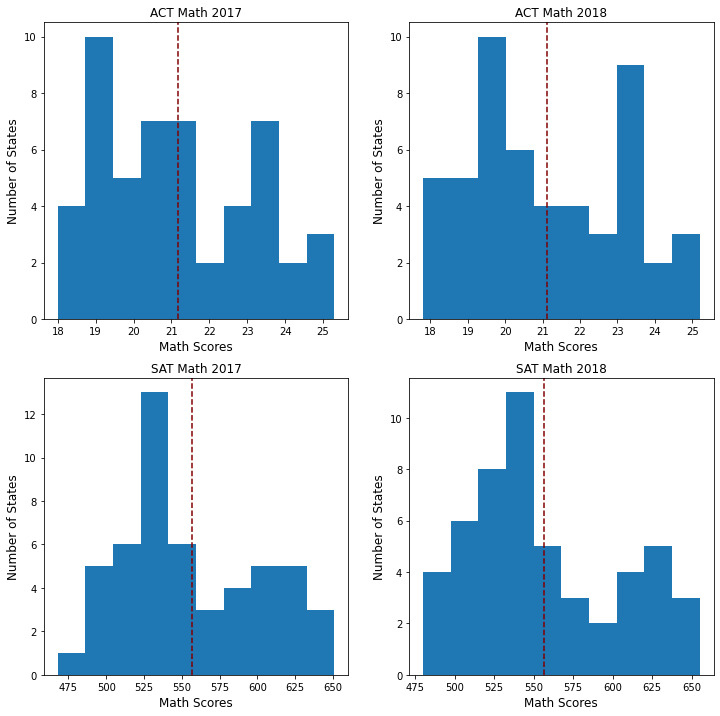

In [88]:
subplot_histograms(
                    final, 
                    ['act_2017_math', 
                     'act_2018_math',
                     'sat_2017_math', 
                     'sat_2018_math'],
                    ['ACT Math 2017',
                     'ACT Math 2018',
                     'SAT Math 2017',
                     'SAT Math 2018'], 
                     'Math Scores'
)

The mean for both Math tests nationally have little variance from 2017 to 2018. Although some increase in the number of states is noted at the lower end of Maths scores from 2017 to 2018. 

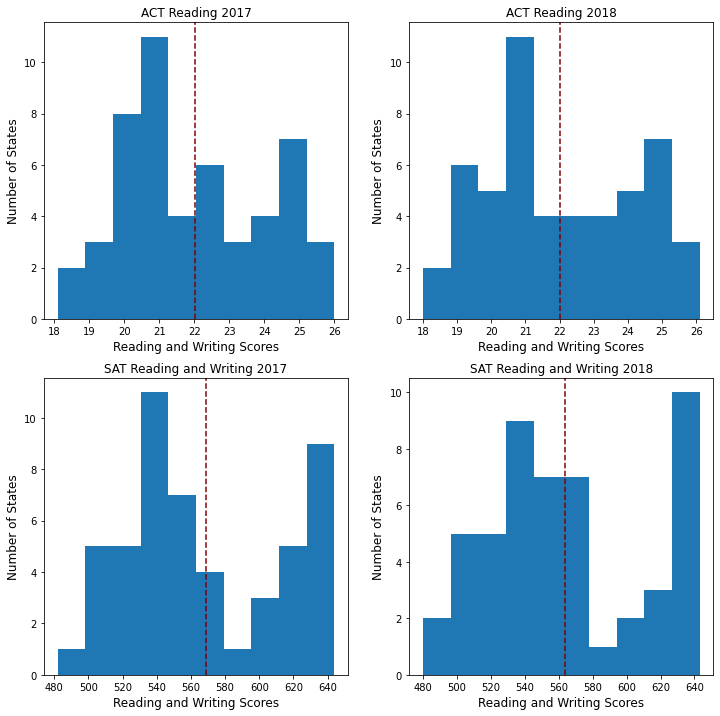

In [89]:
subplot_histograms(
                    final, 
                    ['act_2017_reading', 
                     'act_2018_reading',
                     'sat_2017_reading_writing', 
                     'sat_2018_reading_writing'],
                    ['ACT Reading 2017',
                     'ACT Reading 2018',
                     'SAT Reading and Writing 2017',
                     'SAT Reading and Writing 2018'], 
                     'Reading and Writing Scores'
)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.01, 'SAT 2017 and ACT 2017 Math Scores')

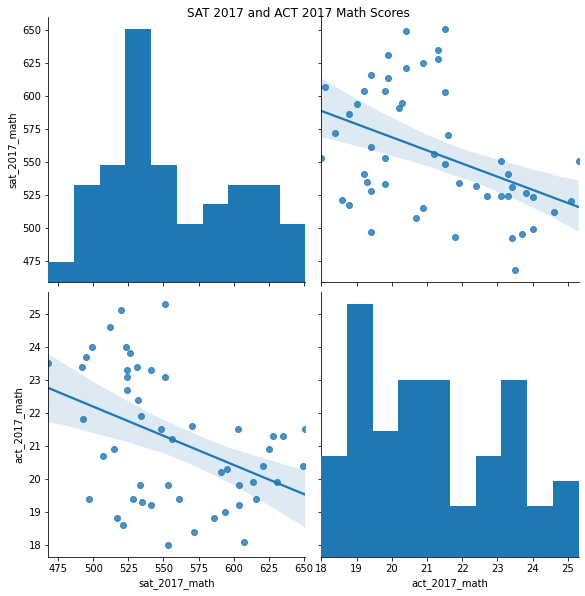

In [90]:
pairplot_math_sat_act = sns.pairplot(final[['sat_2017_math', 
                                            'act_2017_math']],
                                     height=4, 
                                     kind='reg')
pairplot_math_sat_act.fig.suptitle("SAT 2017 and ACT 2017 Math Scores", y=1.01)

Text(0.5, 1.01, 'SAT 2017 and ACT 2017 Reading and Writing Scores')

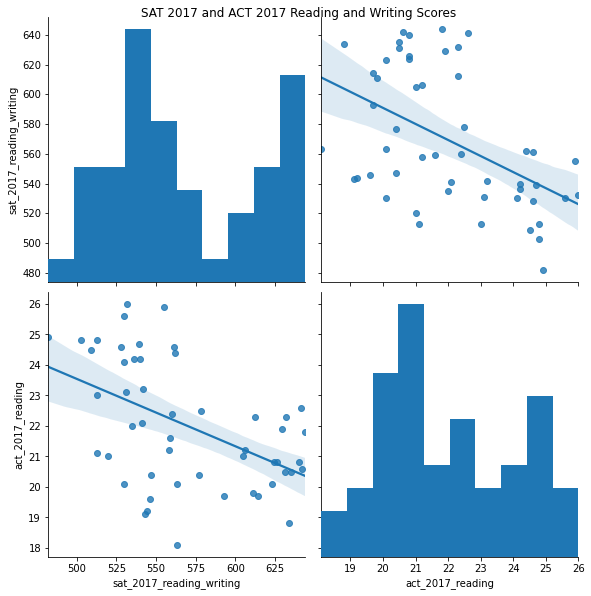

In [91]:
pairplot_math_sat_act = sns.pairplot(final[['sat_2017_reading_writing', 
                                            'act_2017_reading']],
                                     height=4, 
                                     kind='reg')
pairplot_math_sat_act.fig.suptitle("SAT 2017 and ACT 2017 Reading and Writing Scores", y=1.01)

Text(0.5, 1.01, 'SAT 2017 total scores and ACT 2017 composite scores')

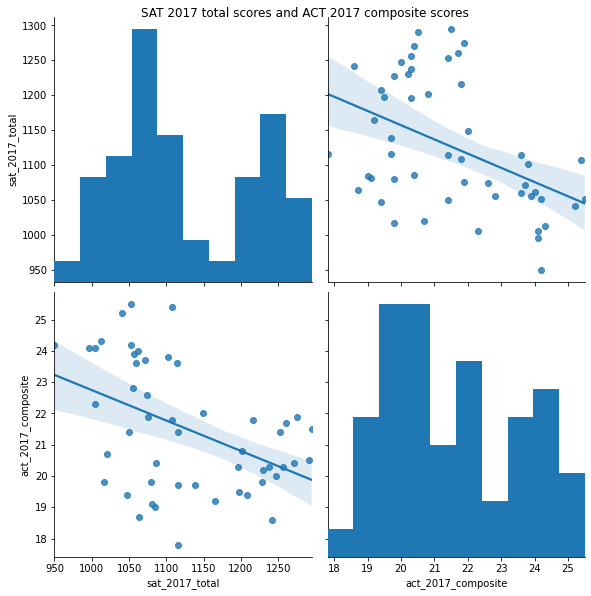

In [92]:
pairplot_math_sat_act = sns.pairplot(final[['sat_2017_total', 
                                            'act_2017_composite']],
                                     height=4, 
                                     kind='reg')
pairplot_math_sat_act.fig.suptitle("SAT 2017 total scores and ACT 2017 composite scores", y=1.01)

Text(0.5, 1.01, 'SAT 2017 and SAT 2018 Total Scores')

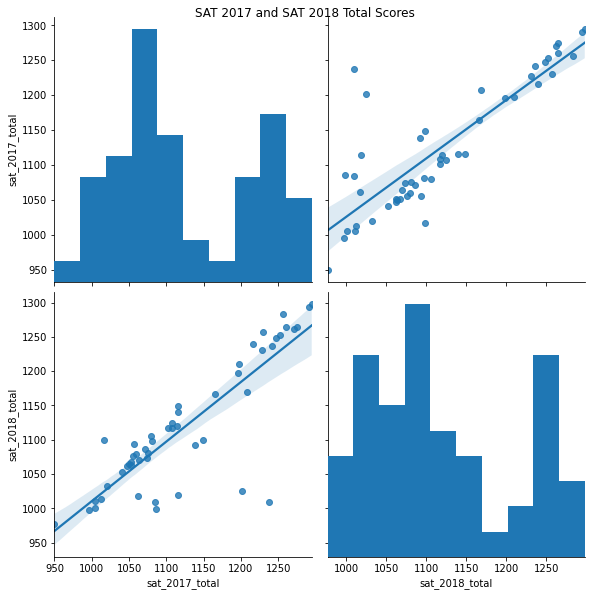

In [93]:
pairplot_math_sat_act = sns.pairplot(final[['sat_2017_total', 
                                            'sat_2018_total']],
                                     height=4, 
                                     kind='reg')
pairplot_math_sat_act.fig.suptitle("SAT 2017 and SAT 2018 Total Scores", y=1.01)

Text(0.5, 1.01, 'ACT 2017 and ACT 2018 Composite Scores')

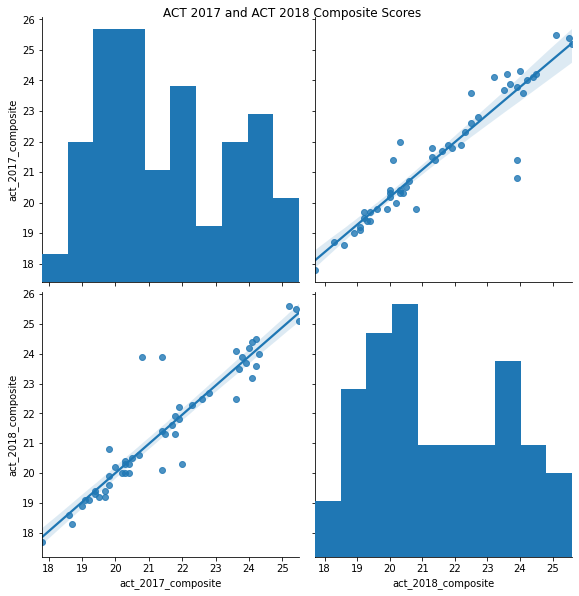

In [94]:
pairplot_math_sat_act = sns.pairplot(final[['act_2017_composite', 
                                            'act_2018_composite']],
                                     height=4, 
                                     kind='reg')
pairplot_math_sat_act.fig.suptitle("ACT 2017 and ACT 2018 Composite Scores", y=1.01)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

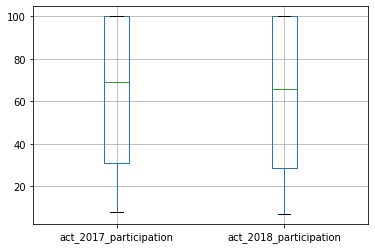

In [95]:
# Code
final.boxplot(column=['act_2017_participation', 'act_2018_participation'])

ACT 2018 participation shows a wider spread of percentage point and a lower median as compared to the year before.

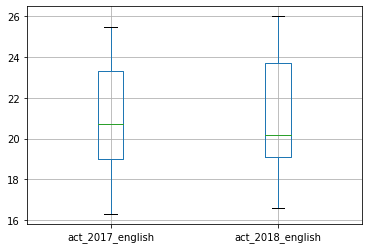

In [96]:
final.boxplot(column=['act_2017_english', 'act_2018_english'])

ACT 2018 english scores show a slightly wider spread and a lower median as compared to the year before.

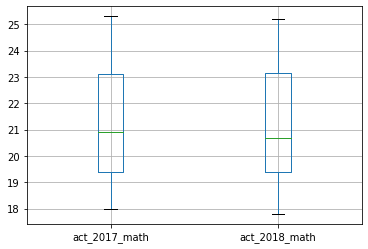

In [97]:
final.boxplot(column=['act_2017_math', 'act_2018_math'])

ACT 2018 math scores show a slightly wider spread and a lower median as compared to the year before.

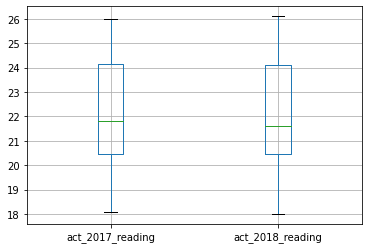

In [98]:
final.boxplot(column=['act_2017_reading', 'act_2018_reading'])

ACT 2018 math scores show a slightly wider spread and a lower median as compared to the year before.

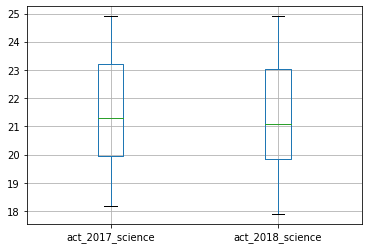

In [99]:
final.boxplot(column=['act_2017_science', 'act_2018_science'])

ACT 2018 science scores show a slightly wider spread and a lower median as compared to the year before.

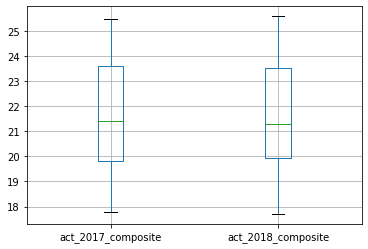

In [100]:
final.boxplot(column=['act_2017_composite', 'act_2018_composite'])

Consistent with the analysis above, ACT 2018 composite scores show a slightly wider spread and a lower median as compared to the year before.

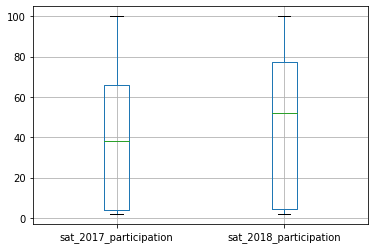

In [101]:
final.boxplot(column=['sat_2017_participation', 'sat_2018_participation'])

SAT 2018 participation shows a wider spread and higher median as compared to the year before. More states nation-wide are recording higher SAT participation rates. 

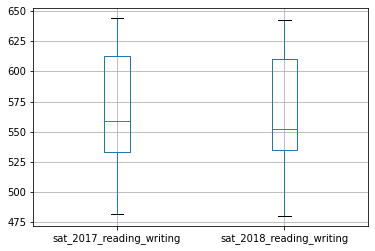

In [102]:
final.boxplot(column=['sat_2017_reading_writing', 'sat_2018_reading_writing'])

SAT 2018 reading and writing shows about the same spread and right-skewed distribution as compared to the year before, and we can see a slight decrease in the median.

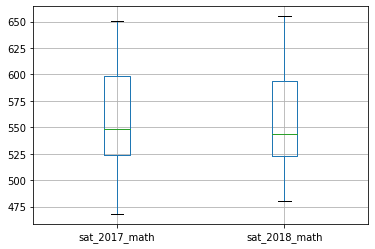

In [103]:
final.boxplot(column=['sat_2017_math', 'sat_2018_math'])

SAT 2018 math shows a slightly lower box length as compared to the year before but we see the same right-skewed distribution for both years. 

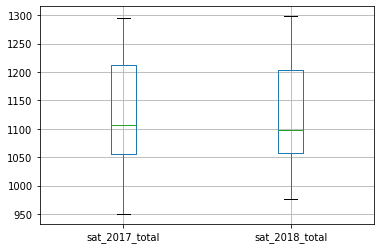

In [104]:
final.boxplot(column=['sat_2017_total', 'sat_2018_total'])

SAT 2018 shows a greater min and max vales as compared to the year before with the same right skewed distribution. 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [105]:
final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


Answers: 

act_2017_participation range of the data is from 1 to 100 as it measures percentages 

In [106]:
final.skew()

act_2017_participation     -0.197989
act_2017_english            0.352660
act_2017_math               0.332683
act_2017_reading            0.269366
act_2017_science            0.218823
act_2017_composite          0.319810
sat_2017_participation      0.346450
sat_2017_reading_writing    0.272693
sat_2017_math               0.365040
sat_2017_total              0.310903
act_2018_participation     -0.021916
act_2018_composite          0.281962
act_2018_english            0.371507
act_2018_math               0.269548
act_2018_reading            0.201361
act_2018_science            0.172383
sat_2018_participation      0.136228
sat_2018_reading_writing    0.282300
sat_2018_math               0.530407
sat_2018_total              0.466432
dtype: float64

In [107]:
final.agg(['mean', 'median', 'count']).transpose()

,count,mean,median
state_x_x,51.0,NaN,NaN
act_2017_participation,51.0,65.254902,69.0
act_2017_english,51.0,20.931373,20.7
act_2017_math,51.0,21.182353,20.9
act_2017_reading,51.0,22.013725,21.8
act_2017_science,51.0,21.450980,21.3
act_2017_composite,51.0,21.519608,21.4
state_index,51.0,NaN,NaN
state_y_x,51.0,NaN,NaN
sat_2017_participation,51.0,39.803922,38.0


|Column|Central Tendency|Spread|Shape/Skewness|Distribution|Notes|
|---|---|---|---|---|---|
|state_index|NA|NA|NA|NA|51 States and the index of the dataset
|act_2017_participation|Mean of 65.25|min of 8 to max of 100 with a high std dev of 32.14|skew of -0.197|bimodal that is heavily skewed to either ends of the range|Range in this dataset is a percentage of the graduating class, States generally choose either one of the two tests and only three States have more than 50% participation for both years
|act_2018_participation|Mean of 61.64|min of 7 to max of 100 with a high std dev of 34.08|skew of -0.02|bimodal that is heavily skewed to either ends of the range|Range in this dataset is a percentage of the graduating class, States generally choose either tests and only three States have more than 50% participation for both years
|act_2017_english|Mean of 20.93|min of 16.3 to max of 25.5 with a std dev of 2.35|skew of 0.352|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is converted from the raw score of each test subject
|act_2018_english|Mean of 20.98|min of 16.60 to max of 26 with a std dev of 2.44|skew of 0.37|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is converted from the raw score of each test subject
|act_2017_math|Mean of 21.18|min of 18 to max of 25.3 with a std dev of 1.98|skew of 0.33|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is converted from the raw score of each test subject
|act_2018_math|Mean of 21.12|min of 17.8 to max of 25.2 with std dev of 2.03|skew of 0.26|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is converted from the raw score of each test subject
|act_2017_reading|Mean of 22.01|min of 18.1 to max of 26 with a std dev of 2.06|skew of 0.26|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is converted from the raw score of each test subject
|act_2018_reading|Mean of 22.01|min of 18 to max of 26.1 with a std dev of 2.16|skew of 0.20|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is converted from the raw score of each test subject
|act_2017_science|Mean of 21.45|min of 18.2 to max of 24.9 with std dev of 1.73|skew of 0.21|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is converted from the raw score of each test subject
|act_2018_science|Mean of 21.34|min of 17.9 to max of 24.9 with std dev of 1.87|skew of 0.17|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is converted from the raw score of each test subject
|act_2017_composite|Mean of 21.51|min of 17.8 to max of 25.5 with std dev of 2.02|skew of 0.31|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is compiled from the ACT test subjects
|act_2018_composite|Mean of 21.48|min of 17.7 to max of 25.6 with std dev of 2.1|skew of 0.28|fairly normal distribution with slight positive skew|ACT uses a scale score of 1-36 that is compiled from the ACT test subjects
|sat_2017_participation|Mean of 39.8|min of 2 to max of 100 with std dev of 35.27|skew of 0.34|bimodal that is heavily skewed to either ends of the range|Range in this dataset is a percentage of the graduating class, States generally choose either one of the two tests and only three States have more than 50% participation for both years
|sat_2018_participation|Mean of 45.74|min of 2 to max of 100 with std dev of 37.31|skew of 0.13|bimodal that is heavily skewed to either ends of the range|Range in this dataset is a percentage of the graduating class, States generally choose either one of the two tests and only three States have more than 50% participation for both years
|sat_2017_reading_writing|Mean of 569.11|min of 482 to max of 644 with std dev of 45.66|skew of 0.27|fairly normal distribution with slight positive skew|SAT uses a scoring system of 200-800
|sat_2018_reading_writing|Mean of 563.68|min of 480 to max of 643 with std dev of 47.5|skew of 0.28|fairly normal distribution with slight positive skew|SAT uses a scoring system of 200-800
|sat_2017_math|Mean of 556.88|min of 468 to max of 651 with std dev of 47.12|skew of 0.36|fairly normal distribution with slight positive skew|SAT uses a scoring system of 200-800
|sat_2018_math|Mean of 556.23|min of 480 to max of 655 with std dev of 47.77|skew of 0.53|fairly normal distribution with moderate positive skew|SAT uses a scoring system of 200-800
|sat_2017_total|Mean of 1126.09|min of 950 to max of 1295 with std dev of 92.49|skew of 0.31|fairly normal distribution with slight positive skew|SAT uses a scoring system of 400-1600 for the total score
|sat_2018_total|Mean of 1120.01|min of 977 to max of 1298 with std dev of 94.15|skew of 0.46|fairly normal distribution with slight positive skew|SAT uses a scoring system of 400-1600 for the total score


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: We do see this trend for most of the ACT and SAT state average test scores but not for the participation rates. Based on the sample size of 51, which is over the threshold of 30 samples required by the Central Limit Theroem, most of the ACT and SAT state average test scores have a skew value of between -0.5 to 0.5 which also is a feature of a normal distribution. The exemption being the SAT math average scores per state for 2018 which had a slightly higher skew of 0.53. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: While we have observed in the histogram for math tests, the national average of the ACT math test for example appears more normally distributed in the boxplot. We should use the estimates with caution, as we will elaborate below, the ACT math scores for a state with a low participation rate in the ACT test will not hold true as the state average math score. We have made similar observations with reading scores. 

The distribution for ACT and SAT participation rates for all 51 states is noticeably skewed to both ends of the range. We have observed that states usually offer either test to their graduating classes with few students sitting for both tests. Only the states of Florida, Georgia and Hawaii have recorded over 50% participation in both tests. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

Answer: 
We can only conduct statistical inference within the SAT data set or ACT data set exclusively. Inference on the correlation of the two SAT and ACT data sets will not be possible without more data and a summary of the issues are given below:

Granularity - these are percentage point averages of each state's graduating class and are not adjusted for the state's student demographics. 

Aggregation - with the points given above, we do have over 100% combined (SAT and ACT) participation rates in these following states, Florida, Georgia, Maryland, Massachusetts, New Jersey, New York, Rhode Island, Texas which suggests that some students in these states did sit for both SAT and ACT.

Relationship between population size and rates - according to the 2011 census done on student enrollments, the difference between the state with the largest student population, California(6,287,834), and the smallest student population, District of Columbia(73,911) is over 6 million. 

As such, we cannot infer that the average participation rates in both the ACT and SAT tests for 2017 and 2018 represent the overall national test participation for the graduating class of 2017 and 2018. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: Comparing ACT and SAT math scores is not recommended. The varying participation of the two tests ACT or SAT make it hard to compare the national average math or reading proficiencies among the states. We have observed that states generally choose one test over the other and few students in the graduating year take both tests. Furthermore, both tests administer different scoring systems with the ACT taking raw test scores and converting them into a scale score for the subject; which is then taken to calculate the state and national averages.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [108]:
# Code: 


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [109]:
states_require_SAT = ['Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
                     'Idaho', 'Illinois', 'Maine', 'Michigan', 'New Hampshire']
states_require_ACT = ['Alabama', 'Hawaii', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'North Dakota', 'Utah', 
                      'Wiscousin', 'Kentucky', 'Louisana', 'Mississippi', 'Wyoming']
states_not_requiring_either = ['Alaska', 'Arizona', 'Arkansas', 'California',
                               'Florida', 'Georgia', 'Indiana','Iowa', 'Kansas', 
                               'Maryland','Massachusetts', 'Minnesota', 'Missouri',
                               'New Jersey', 'New Mexico', 'New York', 'Ohio', 
                               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 
                               'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
                               'Vermont', 'Virginia', 'Washington', 'West Virginia', 
                               'Wisconsin']
states_of_interest = ['Alaska', 'Arizona', 'California', 'Florida', 'Georgia', 
                      'Indiana','Iowa', 'Kansas','Maryland','Massachusetts',
                      'New Jersey', 'New Mexico', 'New York', 'Oregon', 
                      'Pennsylvania', 'Rhode Island', 'South Dakota', 'Texas', 
                      'Vermont', 'Virginia', 'Washington', 'West Virginia']

Here we have filtered down the states for further consideration and removed the states that require High Schools in their state to either use the ACT or SAT. Then we have further narrowed down the list to only include states that do not already register 100% participation in either test. 

https://www.ecs.org/wp-content/uploads/State-Information-Request_Use-of-ACT-SAT-and-PSAT-for-High-School-Testing-as-Required-by-ESSA.pdf

In [110]:
final['state_index'].values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [111]:
states_of_interest_df = final[final['state_index'].isin(states_of_interest)][["state_index",
                                                      "act_2017_participation", 
                                                      "act_2018_participation", 
                                                      "sat_2017_participation", 
                                                      "sat_2018_participation"]]
states_of_interest_df.head(50)

,state_index,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
1,Alaska,65.0,33.0,38.0,43.0
2,Arizona,62.0,66.0,30.0,29.0
4,California,31.0,27.0,53.0,60.0
9,Florida,73.0,66.0,83.0,56.0
10,Georgia,55.0,53.0,61.0,70.0
14,Indiana,35.0,32.0,63.0,63.0
15,Iowa,67.0,68.0,2.0,3.0
16,Kansas,73.0,71.0,4.0,4.0
20,Maryland,28.0,31.0,69.0,76.0
21,Massachusetts,29.0,25.0,76.0,80.0


In [112]:
states_of_interest_df['act_sat_2017participation'] = (
    states_of_interest_df["act_2017_participation"] + states_of_interest_df['sat_2017_participation'])

states_of_interest_df['act_sat_2018participation'] = (
    states_of_interest_df["act_2018_participation"] + states_of_interest_df['sat_2018_participation'])

In [115]:
shortlist = states_of_interest_df.loc[(states_of_interest_df['act_sat_2018participation']<100) & 
                          (states_of_interest_df['act_sat_2017participation']<100)][['state_index',
                                                                                   'act_2017_participation', 
                                                                                   'act_2018_participation', 
                                                                                   'sat_2017_participation', 
                                                                                   'sat_2018_participation',
                                                                                   'act_sat_2017participation', 
                                                                                   'act_sat_2018participation',]]

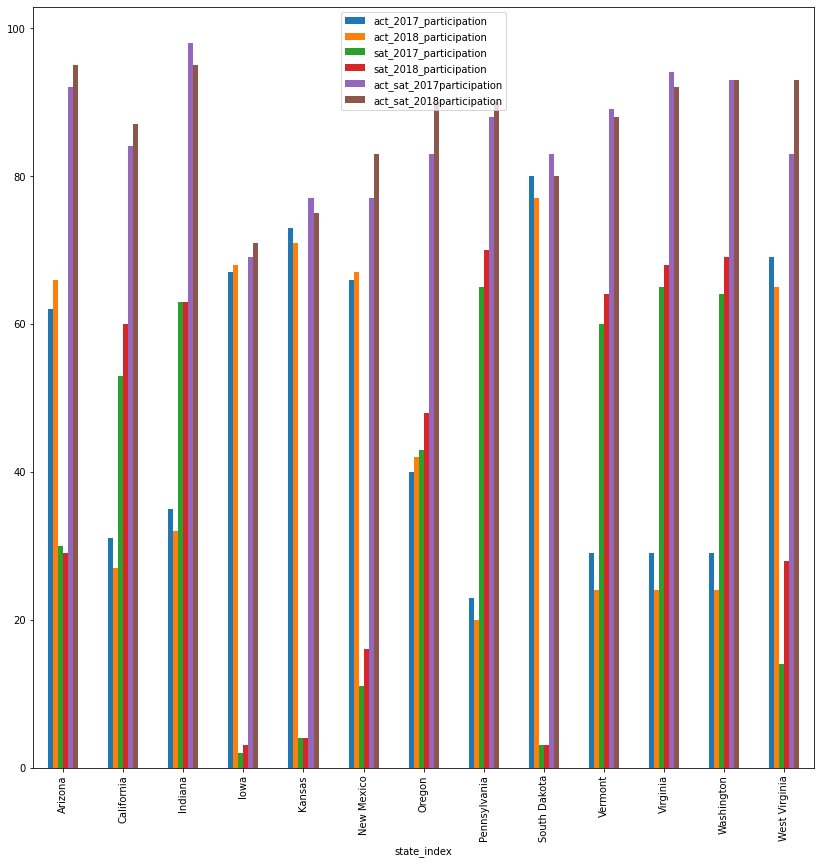

In [128]:
shortlist.plot(kind='bar', figsize=(14,14), x='state_index')

Here we have narrowed the list to only include those states that are under 100% participation for the combined participation rates for that state in 2017 and 2018. 

In [114]:
states_of_interest_df.loc[states_of_interest_df['act_sat_2018participation']>100][['state_index',
                                                                                   'act_2017_participation', 
                                                                                   'act_2018_participation', 
                                                                                   'sat_2017_participation', 
                                                                                   'sat_2018_participation',
                                                                                   'act_sat_2017participation', 
                                                                                   'act_sat_2018participation',]]

,state_index,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation,act_sat_2017participation,act_sat_2018participation
9,Florida,73.0,66.0,83.0,56.0,156.0,122.0
10,Georgia,55.0,53.0,61.0,70.0,116.0,123.0
20,Maryland,28.0,31.0,69.0,76.0,97.0,107.0
21,Massachusetts,29.0,25.0,76.0,80.0,105.0,105.0
30,New Jersey,34.0,31.0,70.0,82.0,104.0,113.0
32,New York,31.0,27.0,67.0,79.0,98.0,106.0
39,Rhode Island,21.0,15.0,71.0,97.0,92.0,112.0
43,Texas,45.0,41.0,62.0,66.0,107.0,107.0


In [135]:
three_states = ["California", "Kansas", "Iowa", "New Mexico"]

three_states_consideration = states_of_interest_df[states_of_interest_df['state_index'].isin(three_states)][['state_index',
                                                                                   'act_2017_participation', 
                                                                                   'act_2018_participation', 
                                                                                   'sat_2017_participation', 
                                                                                   'sat_2018_participation',
                                                                                   'act_sat_2017participation', 
                                                                                   'act_sat_2018participation',]]
three_states_consideration

,state_index,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation,act_sat_2017participation,act_sat_2018participation
4,California,31.0,27.0,53.0,60.0,84.0,87.0
15,Iowa,67.0,68.0,2.0,3.0,69.0,71.0
16,Kansas,73.0,71.0,4.0,4.0,77.0,75.0
31,New Mexico,66.0,67.0,11.0,16.0,77.0,83.0


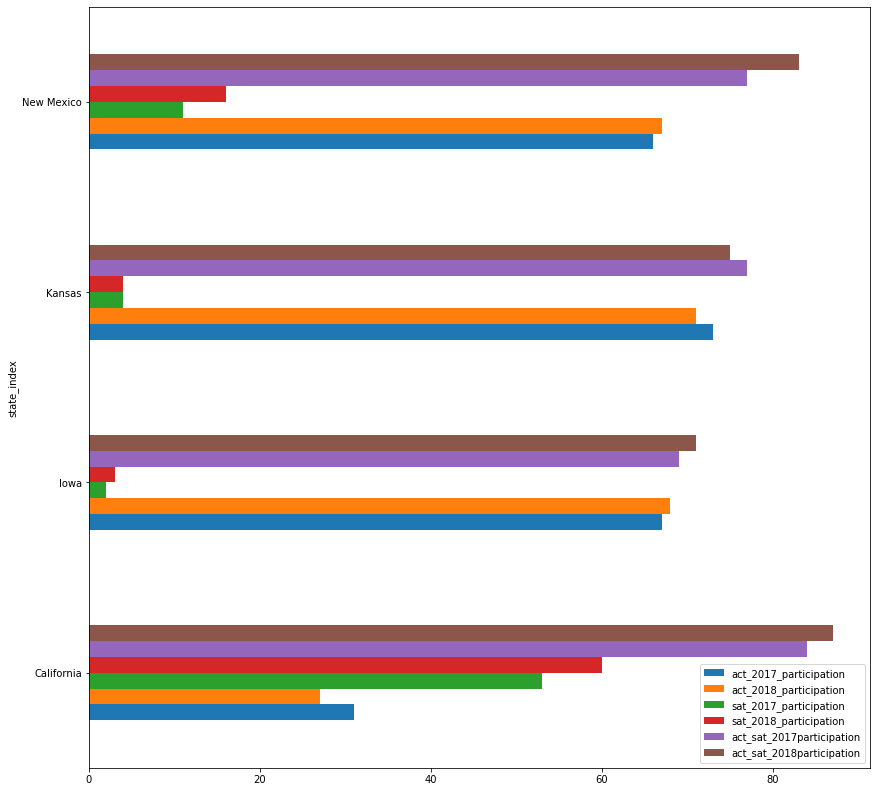

In [137]:
three_states_consideration.plot(kind='barh', figsize=(14,14), x='state_index')

In [ ]:
#graph out in tableau the student population sizes for comparision

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

We found that 18 out of the 50 states have 100% participation rate for 2017 and 2018 in either the ACT or SAT tests. Furthermore, the education commission of the states report that 23 states administer either the ACT or SAT tests to their student population. We then further eliminated the states which had an over 100% rate when we combined ACT and SAT participation for 2017 and 2018 for that state. We found that this state mandated action as a strong driver of 
states recording 100% participation in either SAT or ACT tests. 

https://www.ecs.org/wp-content/uploads/State-Information-Request_Use-of-ACT-SAT-and-PSAT-for-High-School-Testing-as-Required-by-ESSA.pdf

California, 988,438 test takers completed the SAT or a PSAT‐related assessment (PSAT/NMSQT, PSAT10 or PSAT8/9) in the 2016-17 school year.

https://reports.collegeboard.org/pdf/2017-california-sat-suite-assessments-annual-report.pdf

Kansas, 21,438 test takers completed the SAT or a PSAT‐related assessment (PSAT/NMSQT, PSAT10 or PSAT8/9) in the 2016-17 school year.

https://reports.collegeboard.org/pdf/2017-kansas-sat-suite-assessments-annual-report.pdf

Iowa, 12,532 test takers completed the SAT or a PSAT‐related assessment (PSAT/NMSQT, PSAT10 or PSAT8/9) in the 2016-17 school year.

https://reports.collegeboard.org/pdf/2017-iowa-sat-suite-assessments-annual-report.pdf

We recommend that we look further into California, by student population size (6,186,278) is the largest state population in the US, a percentage increase in this state would ensure the greatest coverage of students taking the SAT tests as compared to the other states that were considered. There were three states where the combined participation in ACT and SAT were in the 70 percent range (Iowa, Kansas and New Mexico) but taking into account the current population density of those states and the expected population growth of those countries, they are less attractive candidates. in California, 60% of the graduating class took the SAT as compared to 27% who took the ACT, combining for a total of 87% participation. That equates to about 850,000 students not covered by either the ACT or SAT test in California based on National Center for Education Statistics for Enrollment in public schools.

National Center for Education Statistics for Enrollment in public elementary and secondary schools, by region, state, and jurisdiction: Selected years, fall 1990 through fall 2023

https://nces.ed.gov/programs/digest/d13/tables/dt13_203.20.asp
https://www.cde.ca.gov/ds/sd/cb/ceffingertipfacts.asp